# Unsupervised Learning - KMean

## 1. First of all, we will import the required libraries and get access to the functions.



In [1]:
#Let's import the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset 

The dataset is taken from the kaggle website. You can easily download it from the given link. To load the dataset, we use the pd.read_csv() function. head() returns the first five rows of the dataset.

In [5]:
ls

 Apply inertia and silhouette score with Python.ipynb
Build a decision tree with Python.ipynb
Build and cross-validate a random forest model with Python.ipynb
Construct a Naive Bayes model with Python.ipynb
Construct a logistic regression model with Python.ipynb
Exemplar multiple linear regression.ipynb
Exemplar simple linear regression.ipynb
Exemplar_ logistic regression.ipynb
Exemplar_Build a K-means model.ipynb
Exemplar_Build a Naive Bayes model.ipynb
Exemplar_Build a decision tree.ipynb
Exemplar_Build a random forest model.ipynb
Exemplar_Build an XGBoost model.ipynb
Exemplar_Evaluate simple linear regression.ipynb
Exemplar_feature engineering.ipynb
Explore one-way versus two-way ANOVA tests with Python.ipynb
Feature engineering with Python.ipynb
Interpret multiple regression results with Python.ipynb
Mall_Customers.csv
TaillePoids.csv
Tune and validate decision trees with Python.ipynb
Untitled.ipynb
Use K-means for color compression with Python.ipynb
cancer.csv
churn-big.csv
churn-

In [6]:
my_data = pd.read_csv('Mall_Customers.csv')
my_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
my_data.size

1000

In [42]:
my_data.shape

(200, 5)

The dataset contains five columns: customer ID, gender, age, annual income in (K$), and spending score from 1-100. 

## 3. Data Preprocessing :

The info() function is used to get quick information about the dataset. It shows the number of entries, columns, total non-null values, memory usage, and datatypes. 


In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
my_data.describe() # check for median when we have outlier and mean when no outlier

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,59.150000,50.200000
std,57.879185,13.969007,24.209046,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,77.000000,73.000000
max,200.000000,70.000000,120.000000,99.000000


To check the missing values in the dataset, we use isnull().sum(), which returns the total number of null values.

In [8]:
#Check missing values 
my_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The box plot or whisker plot is used to detect outliers in the dataset. It also shows a statistical five number summary, which includes the minimum, first quartile, median (2nd quartile), third quartile, and maximum.

<AxesSubplot:>

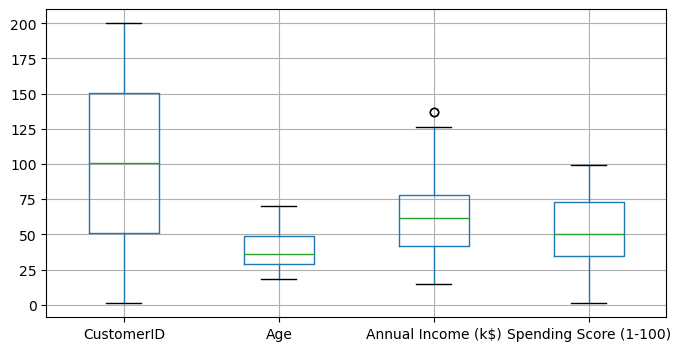

In [9]:
my_data.boxplot(figsize=(8,4))

Using Box Plot, we’ve detected an outlier in the annual income column. Now we will try to remove it before training our model. 

In [13]:
#let's remove outlier from data
med = 61
my_data["Annual Income (k$)"] = np.where(my_data["Annual Income (k$)"] >
 120,med,my_data['Annual Income (k$)'])
my_data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,61,28
197,198,Male,32,61,74
198,199,Male,32,61,18


The outlier in the annual income column has been removed now to confirm we used the box plot again.

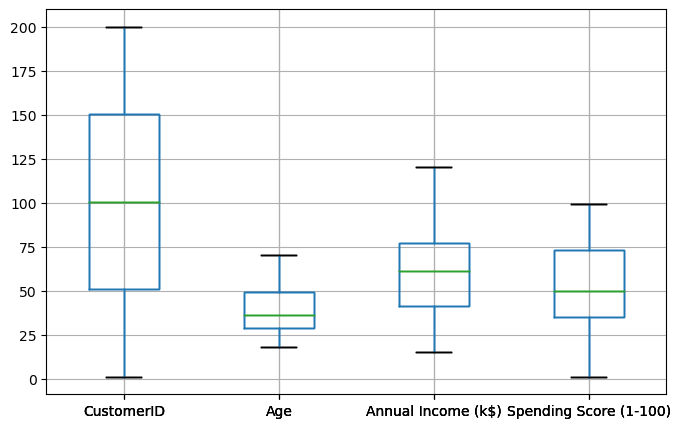

In [15]:
my_data.boxplot(figsize=(8,5))
plt.show()

## 4. Data Visualization

A histogram is used to illustrate the important features of the distribution of data. The hist() function is used to show the distribution of data in each numerical column.

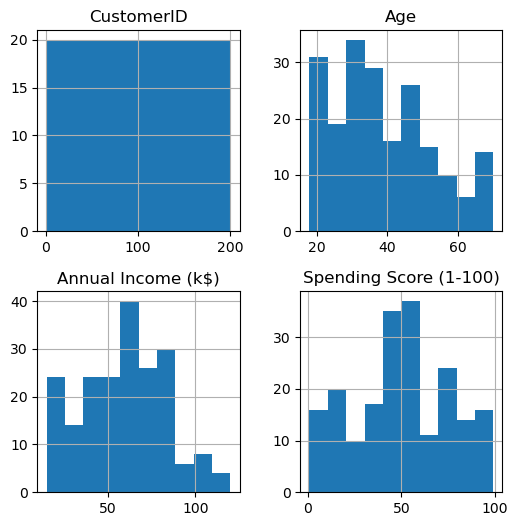

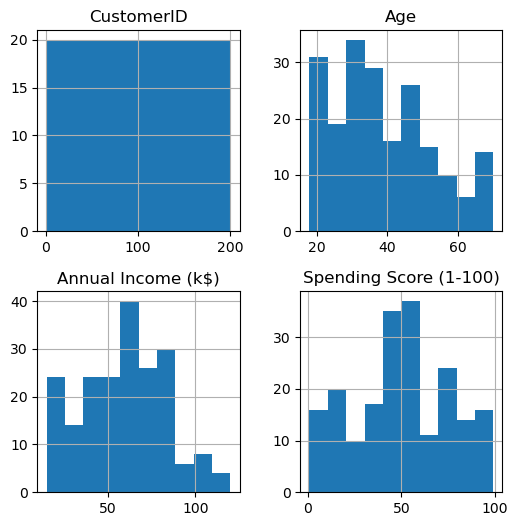

In [23]:
my_data.hist(figsize=(6,6)) 
plt.show()

The correlation heatmap is used to find the potential relationships between variables in the data and to display the strength of those relationships. To display the heatmap, we have used the seaborn plotting library.

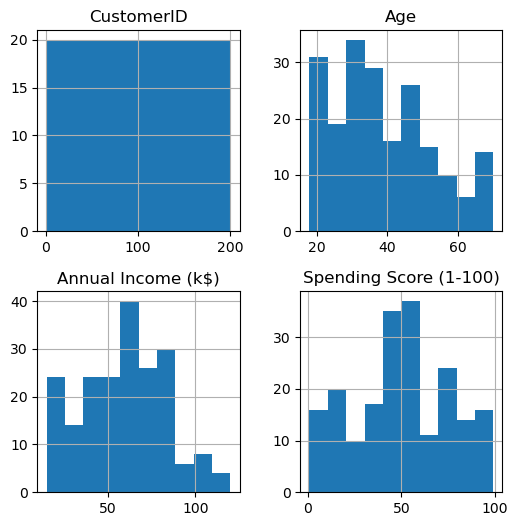

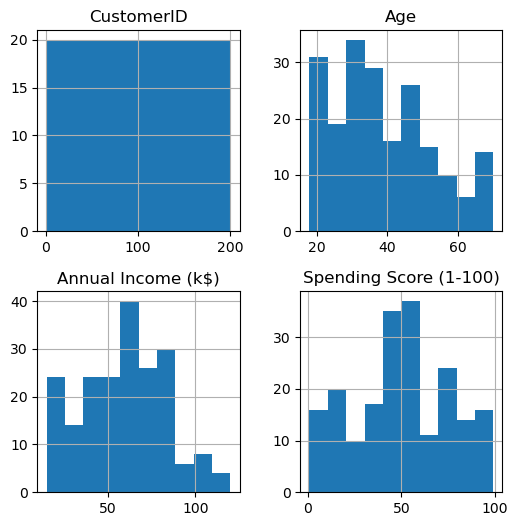

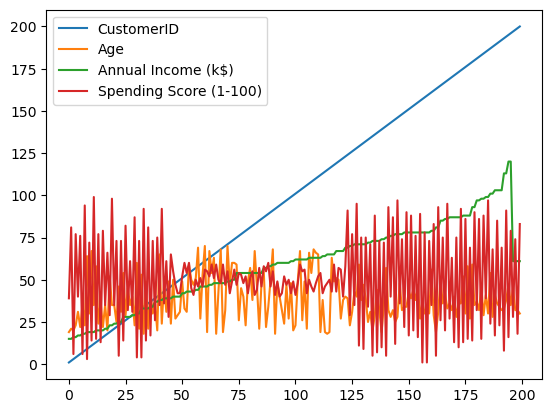

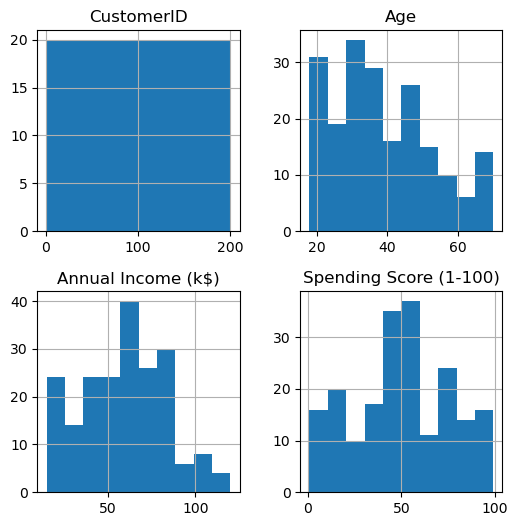

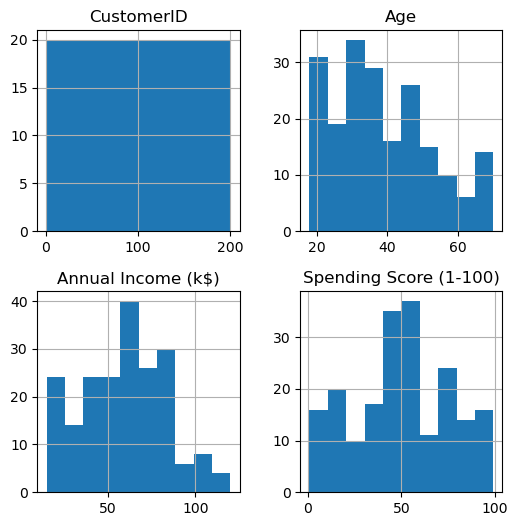

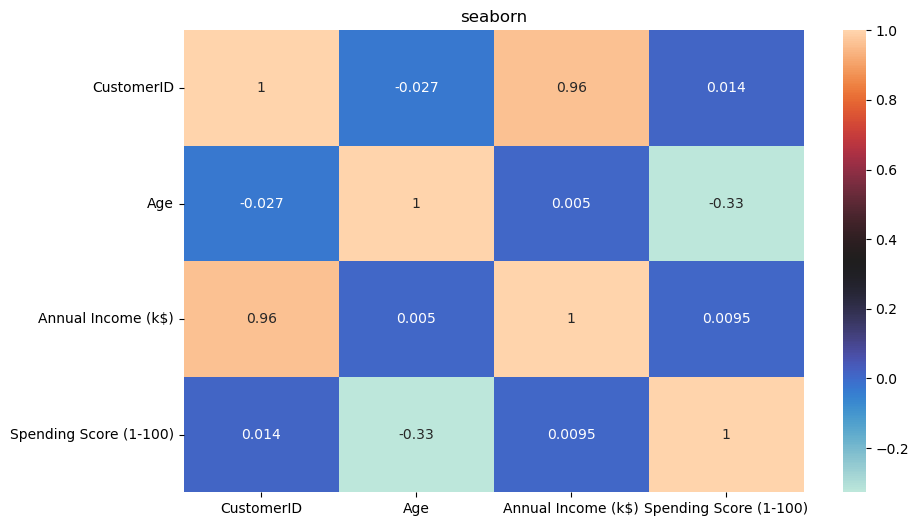

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(my_data.corr(), annot=True, cmap='icefire').set_title('seaborn')
plt.show()

# Choosing the Best K Value
The iloc() function is used to select a particular cell of the data. It enables us to select a value that belongs to a specific row or column. Here, we’ve chosen the annual income and spending score columns.

In [43]:
print(my_data.columns)
X_val = my_data.iloc[:, 3:].values

X_val


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [25]:
# Loading Kmeans Library

from sklearn.cluster import KMeans

Now we will select the best value for K using the Elbow’s method. It is used to determine the optimal number of clusters in K-means clustering.

In [26]:
my_val = []

for i in range(1,11):

    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 123)

    kmeans.fit(X_val)

    my_val.append(kmeans.inertia_)

The sklearn.cluster.KMeans() is used to choose the number of clusters along with the initialization of other parameters. To display the result, just call the variable.

In [27]:
my_val

[249333.49999999997,
 162614.1112444978,
 99847.26577466179,
 67082.21805967783,
 37988.07769728929,
 32446.914804158914,
 27876.543164687275,
 23630.823066210272,
 20454.648277648277,
 18210.101558943792]

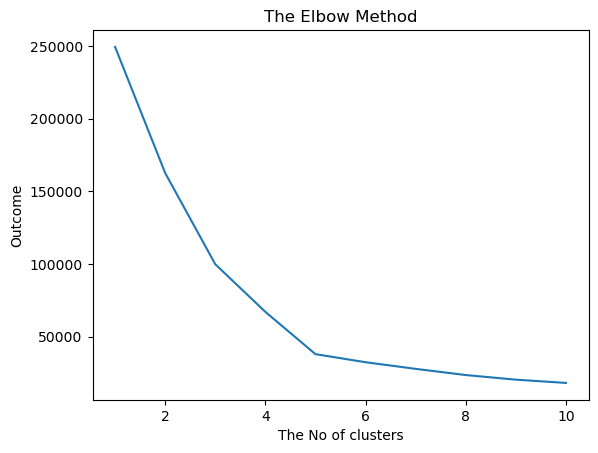

In [28]:
#Visualization of clusters using elbow’s method

plt.plot(range(1,11),my_val)

plt.xlabel('The No of clusters')

plt.ylabel('Outcome')

plt.title('The Elbow Method')

plt.show()

Through Elbow’s Method, when the graph looks like an arm, then the elbow on the arm is the best value of K. In this case, we’ve taken K=3, which is the optimal value for K.

In [49]:
kmeans = KMeans(n_clusters = 4, init='k-means++')

kmeans.fit(X_val)



KMeans(n_clusters=4)

In [50]:
#To show centroids of clusters 

kmeans.cluster_centers_


array([[48.38613861, 56.65346535],
       [83.5       , 82.34210526],
       [83.28947368, 18.63157895],
       [26.30434783, 20.91304348]])

In [51]:
#Prediction of K-Means clustering 
y_kmeans = kmeans.fit_predict(X_val)

y_kmeans

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1], dtype=int32)

## Splitting the dataset into three clusters

The scatter graph is used to plot the classification results of our dataset into three clusters.

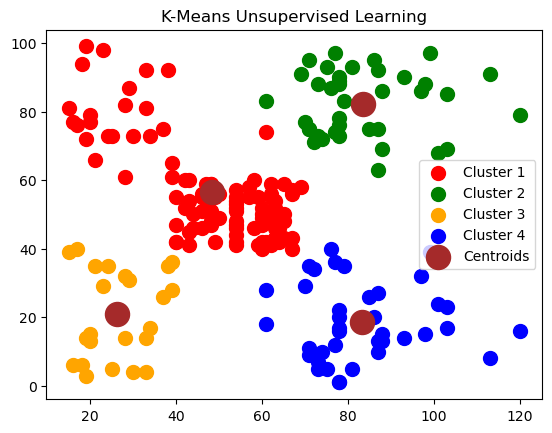

In [52]:
import matplotlib.pyplot as plt

# Assuming X_val and y_kmeans are already defined
plt.scatter(X_val[y_kmeans == 0, 0], X_val[y_kmeans == 0, 1], c='red', s=100, label='Cluster 1')
plt.scatter(X_val[y_kmeans == 1, 0], X_val[y_kmeans == 1, 1], c='green', s=100, label='Cluster 2')
plt.scatter(X_val[y_kmeans == 2, 0], X_val[y_kmeans == 2, 1], c='orange', s=100, label='Cluster 3')
plt.scatter(X_val[y_kmeans == 3, 0], X_val[y_kmeans == 3, 1], c='blue', s=100, label='Cluster 4')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='brown', label='Centroids')

plt.title('K-Means Unsupervised Learning')
plt.legend()
plt.show()

